# Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, cluster
from sklearn.datasets import make_blobs
import time

In [2]:
n_samples = 1500

In [3]:
noisy_circles, y_noisy_circles = datasets.make_circles(
    n_samples = 5000,factor = 0.5,noise = .05,random_state = 0)

noisy_moons, y_noisy_moons = datasets.make_moons(
    n_samples = n_samples, noise = .05)

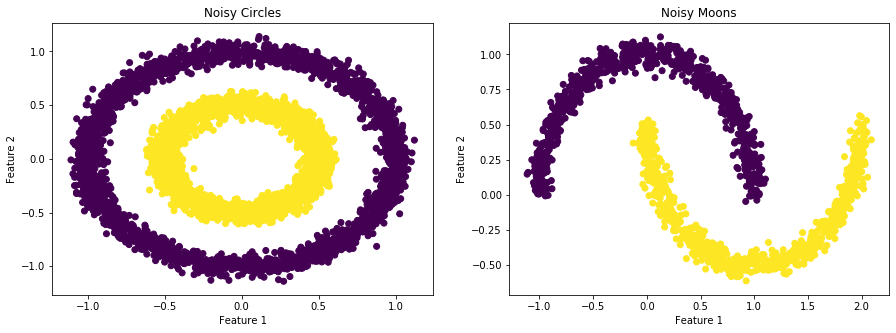

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1], c = y_noisy_circles)
plt.title("Noisy Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1,2,2)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1], c = y_noisy_moons)
plt.title("Noisy Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

In [5]:
blobs, y_blobs = datasets.make_blobs(
    n_samples = 5000, random_state = 0,center_box = (-21,21))

no_structure = np.random.rand(n_samples, 2)

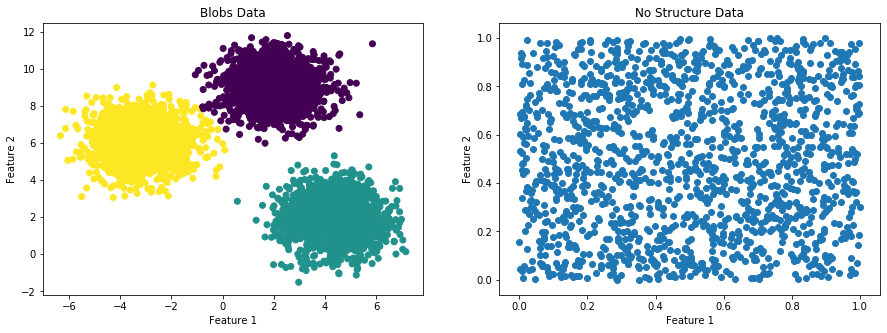

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(blobs[:,0], blobs[:,1], c = y_blobs)
plt.title("Blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1,2,2)
plt.scatter(no_structure[:,0], no_structure[:,1])
plt.title("No Structure Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

In [7]:
transformation = [[0.1, -0.2], [-0.1, 0.4]]
blobs_aniso = np.dot(blobs, transformation)

blobs_varied,y_blobs_varied = datasets.make_blobs(n_samples = 5000, random_state = 170, 
                                                  center_box = (-7,7),
                                                  cluster_std = [0.1, 0.7, 1.2])

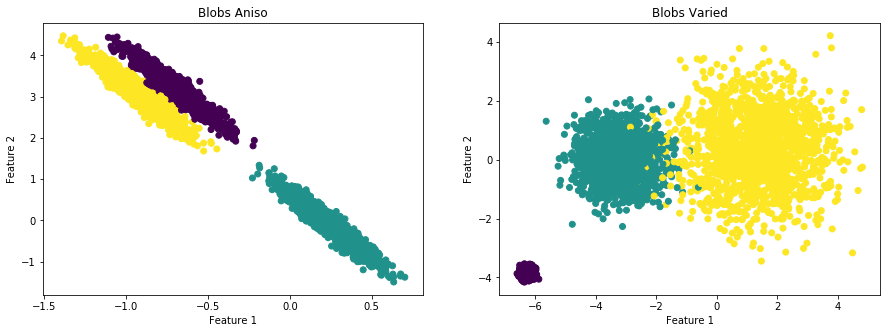

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(blobs_aniso[:,0], blobs_aniso[:,1], c = y_blobs)
plt.title("Blobs Aniso")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1,2,2)
plt.scatter(blobs_varied[:,0], blobs_varied[:,1], c = y_blobs_varied)
plt.title("Blobs Varied")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

# K-Means

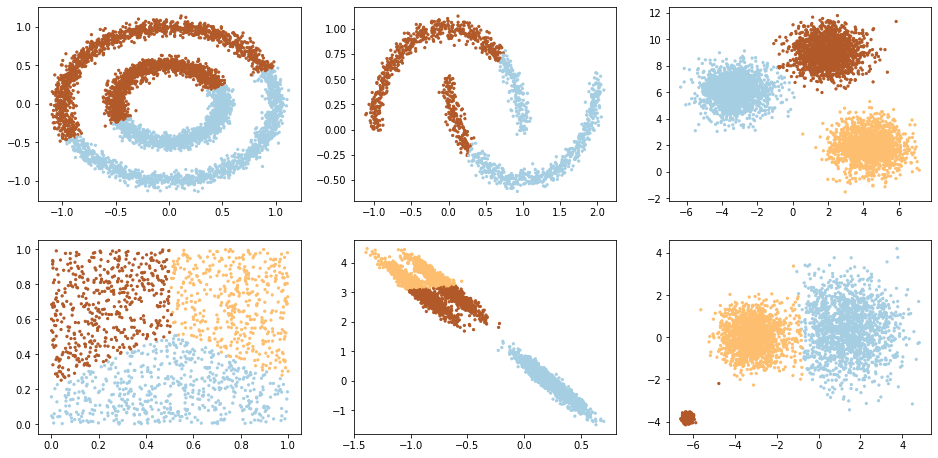

In [9]:
data_list = [noisy_circles, noisy_moons, blobs, no_structure, blobs_aniso, blobs_varied]

plt.figure(figsize = (16,25))
plot_num = 1

for data in enumerate(data_list):
    
    if data[0] == 0 or data[0] == 1:
        n=2
    else:
        n=3
        
    mod_kmeans = cluster.KMeans(n_clusters = n) 
    mod_kmeans.fit(data[1])
    
    plt.subplot(len(data_list), 3, plot_num)
    plot_num+=1
    plt.scatter(data[1][:,0], data[1][:,1], c = mod_kmeans.labels_, s = 5, cmap = plt.cm.Paired)
    
plt.show()

# Hierarchical Clustering

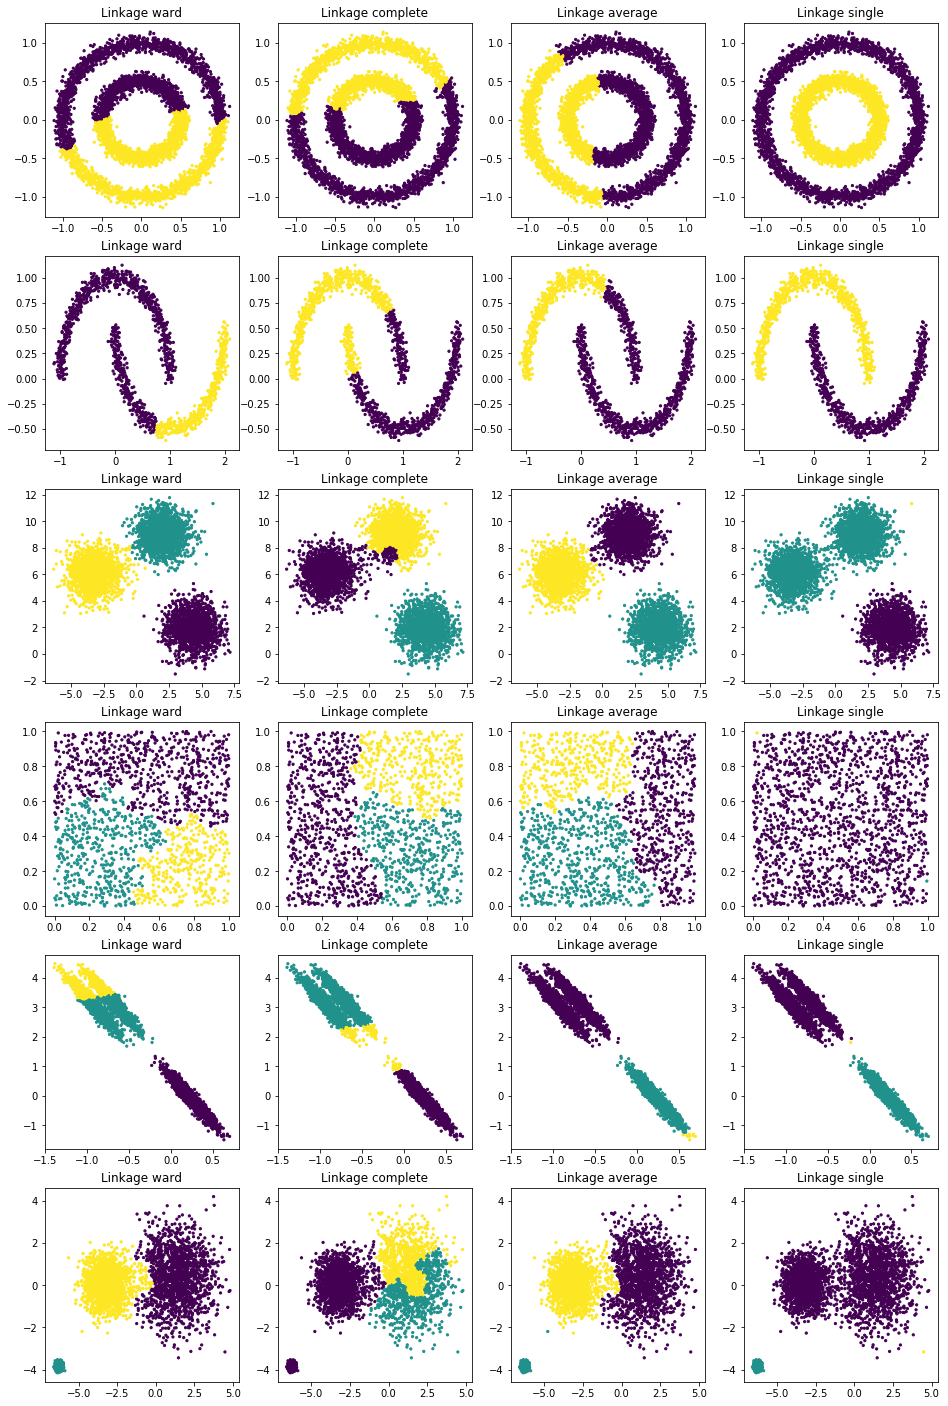

In [10]:
plt.figure(figsize = (16,25))

data_list = [noisy_circles, noisy_moons, blobs, no_structure, blobs_aniso, blobs_varied]
linkage = ["ward", "complete", "average", "single"]

plot_num = 1

for data in enumerate(data_list):
    for lkg in enumerate(linkage):

        if data[0] == 0 or data[0] == 1:
            n=2
        else:
            n=3
        
        mod_hierarchical = cluster.AgglomerativeClustering(linkage = lkg[1], n_clusters = n)
        mod_hierarchical.fit(data[1])
        
        plt.subplot(len(data_list), len(linkage), plot_num)
        plot_num += 1 
        plt.title("Linkage %s" %(lkg[1]))
        plt.scatter(data[1][:,0], data[1][:,1], c = mod_hierarchical.labels_,s = 5)
plt.show()

# DBSCAN

In [11]:
from sklearn.neighbors import NearestNeighbors

In [12]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(noisy_circles)
distances, indices = nbrs.kneighbors(noisy_circles)

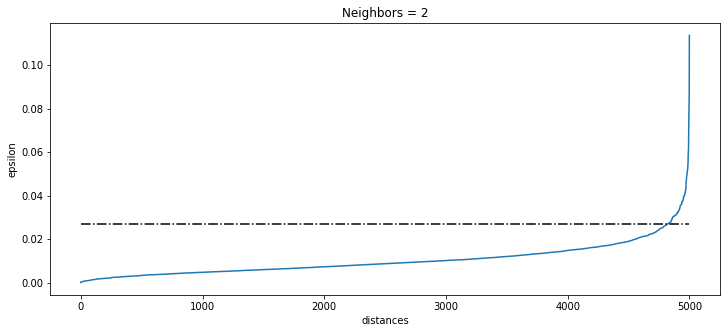

In [13]:
distances = np.sort(distances, axis=0)
dist = distances[:,1]

plt.figure(figsize = (12,5))
plt.plot(dist)
plt.plot(np.array([0, 5000]), np.array([0.027, 0.027]), "-." , color = "k")

plt.ylabel("epsilon")
plt.xlabel("distances")
plt.title("Neighbors = 2")

plt.show()

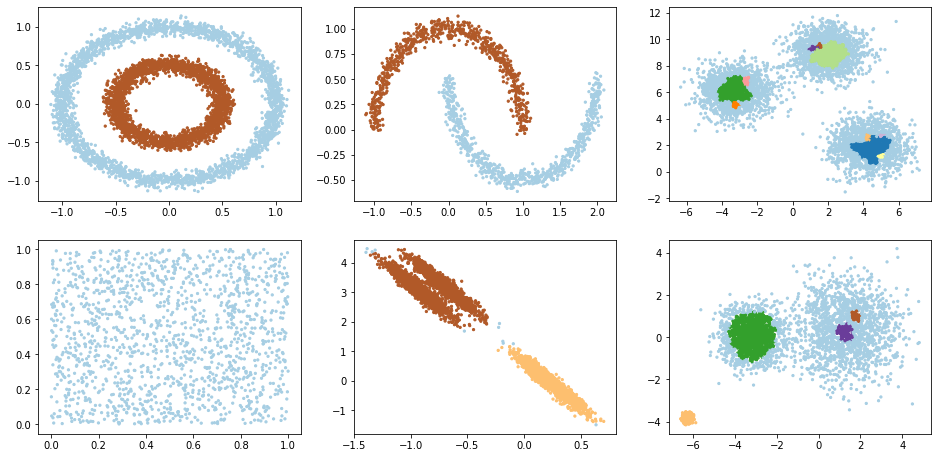

In [14]:
data_list = [noisy_circles, noisy_moons, blobs, no_structure, blobs_aniso, blobs_varied]

plt.figure(figsize = (16,25))
plot_num = 1

for data in enumerate(data_list):
    mod_dbscan = cluster.DBSCAN(eps = 0.2, min_samples = 28)
    mod_dbscan.fit(data[1])
    
    plt.subplot(len(data_list), 3, plot_num)
    plot_num+=1
    plt.scatter(data[1][:,0], data[1][:,1], c = mod_dbscan.labels_, s = 5, cmap = plt.cm.Paired)
    
plt.show()

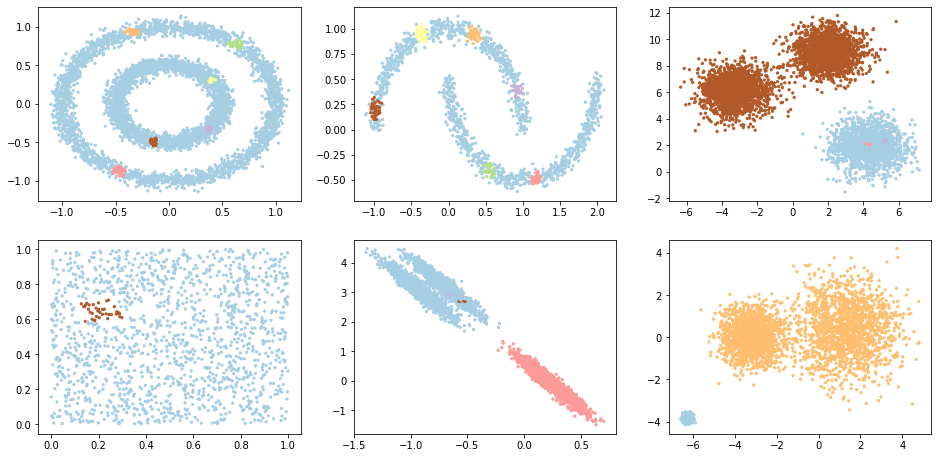

In [15]:
data_list = [noisy_circles, noisy_moons, blobs, no_structure, blobs_aniso, blobs_varied]

plt.figure(figsize = (16,25))
plot_num = 1

for data in enumerate(data_list):
    mod_dbscan = cluster.OPTICS(min_samples = 25)
    mod_dbscan.fit(data[1])
    
    plt.subplot(len(data_list), 3, plot_num)
    plot_num+=1
    plt.scatter(data[1][:,0], data[1][:,1], c = mod_dbscan.labels_, s = 5, cmap = plt.cm.Paired)
    
plt.show()

## *LocalOutlierFactor

In [16]:
from sklearn.neighbors import LocalOutlierFactor

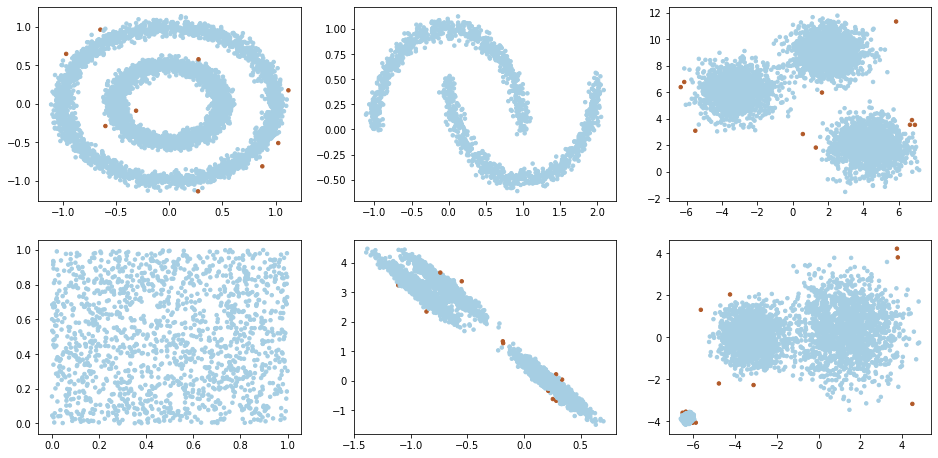

In [17]:
data_list = [noisy_circles, noisy_moons, blobs, no_structure, blobs_aniso, blobs_varied]

plt.figure(figsize = (16,25))
plot_num = 1

for data in enumerate(data_list):
        
    mod_lof = LocalOutlierFactor(n_neighbors = 15)
    y_predict = mod_lof.fit_predict(data[1])
    y_predict_new = mod_lof.negative_outlier_factor_
    
    ind_minus = (y_predict_new <= -2)
    ind_plus = (y_predict_new > -2)

    y_predict_new[ind_minus] = 1
    y_predict_new[ind_plus] = 0
    
    plt.subplot(len(data_list), 3, plot_num)
    plot_num+=1
    plt.scatter(data[1][:,0], data[1][:,1], c = y_predict_new,
                    s = 12, cmap = plt.cm.Paired)
plt.show()

***